<b> 1. [Faster RCNN with FPN](#rcnn)<br>
<b> 2. [YOLO V8](#v8)<br>
<b> 3. [YOLO V5](#v5)<br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
img_folder = 'input/'
imagess = []
for imgg in os.listdir(img_folder):
    imagess.append(img_folder+imgg)

<h2><a id = "rcnn">Faster RCNN with FPN</a></h2>

**Faster Region Convolutional Neural Network with Feature Pyramid Network**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

In [5]:
# Load the pretrained Faster R-CNN with FPN model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  # Set the model to evaluation mode

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [6]:
# COCO class names (indices 0-79 for 80 classes)
COCO_CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
    'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
    'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack',
    'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
    'couch', 'potted plant', 'bed', 'dining table', ' toilet', ' TV', 'laptop', 'mouse', 
    'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [7]:
# Load and preprocess the image
def preprocess_image(imgg):
    image = Image.open(imgg).convert("RGB")
    image_tensor = F.to_tensor(image)
    return image_tensor

In [8]:
def draw_boxes(image, boxes, labels, scores):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)
    ax = plt.gca()
    for box, label, score in zip(boxes, labels, scores):
        xmin, ymin, xmax, ymax = box
        rect = plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             fill=False, edgecolor='red', linewidth=3)
        ax.add_patch(rect)
        ax.text(xmin, ymin, f'{label} {score:.2f}', bbox=dict(facecolor='yellow', alpha=0.5))
        print(label,score)
    plt.axis('off')
    
    # Save the output image
    output_folder_name = 'output/faster_rcnn_output'
    output_file_name = os.path.basename(imgg)  # Separate filename from extension
    output_image_path = os.path.join(output_folder_name, f"{output_file_name}_output.jpg")  # Create descriptive name

    if not os.path.exists(output_folder_name):
        os.makedirs(output_folder_name)

    plt.savefig(output_image_path, dpi=300)  # Save at high resolution (adjust as needed)
    plt.show()
    print(f"Output image saved: {output_image_path}")
    print('-'*50,'\n')

horse tensor(0.9637)
car tensor(0.9391)


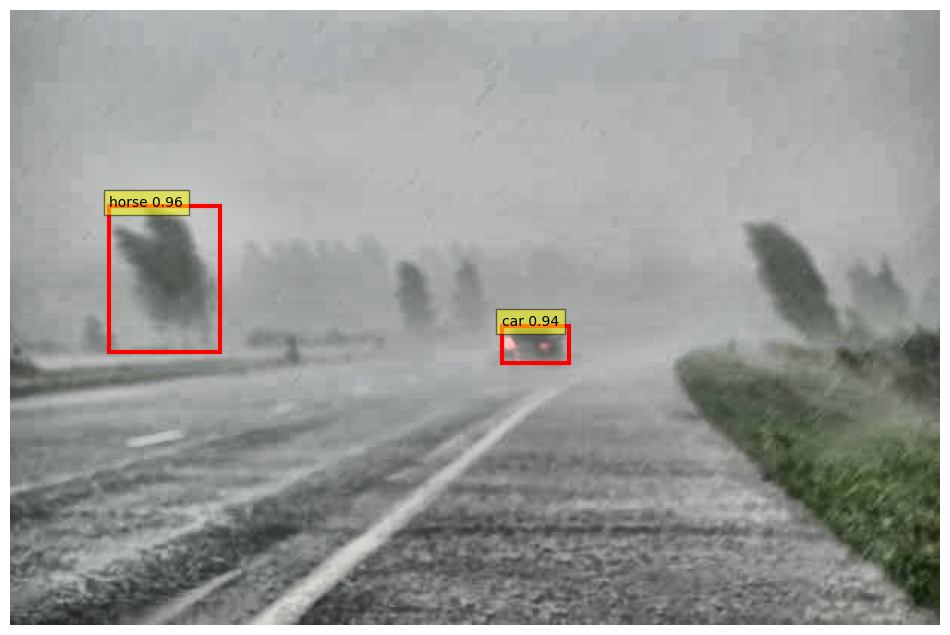

Output image saved: output/faster_rcnn_output/1.png_output.jpg
-------------------------------------------------- 

person tensor(0.9985)
 toilet tensor(0.6594)
handbag tensor(0.5638)
skis tensor(0.5156)


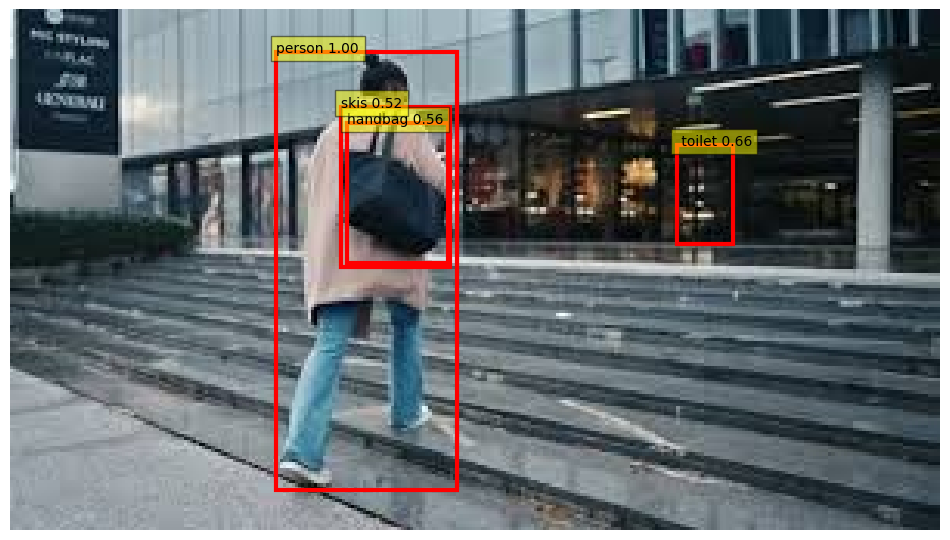

Output image saved: output/faster_rcnn_output/6.jpeg_output.jpg
-------------------------------------------------- 

car tensor(0.9954)
car tensor(0.9037)
truck tensor(0.8385)
car tensor(0.7295)
car tensor(0.7266)
car tensor(0.6701)
car tensor(0.5901)
car tensor(0.5665)
car tensor(0.5382)
truck tensor(0.5281)


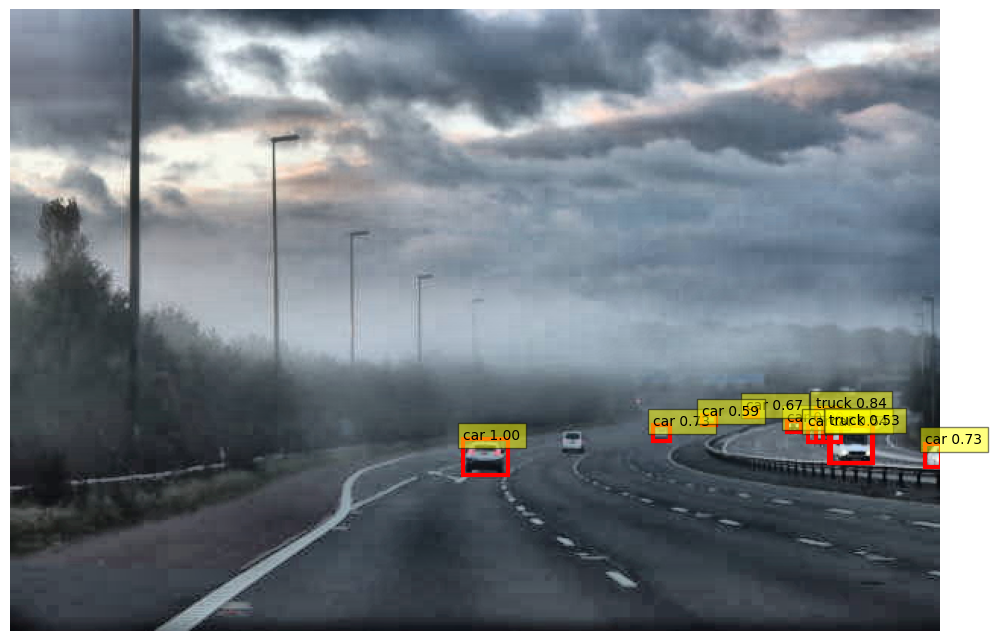

Output image saved: output/faster_rcnn_output/3.png_output.jpg
-------------------------------------------------- 

person tensor(0.9992)
snowboard tensor(0.9948)
refrigerator tensor(0.9857)
keyboard tensor(0.7550)
vase tensor(0.7210)
keyboard tensor(0.6813)
banana tensor(0.6491)
keyboard tensor(0.6277)
snowboard tensor(0.5696)


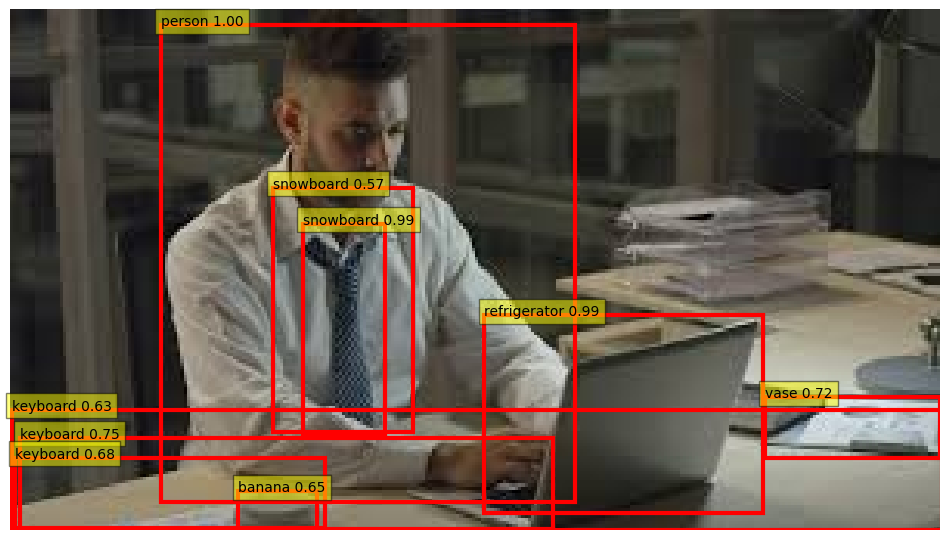

Output image saved: output/faster_rcnn_output/7.jpeg_output.jpg
-------------------------------------------------- 

person tensor(0.9925)
car tensor(0.9639)
bicycle tensor(0.8398)
motorcycle tensor(0.7839)
motorcycle tensor(0.7661)


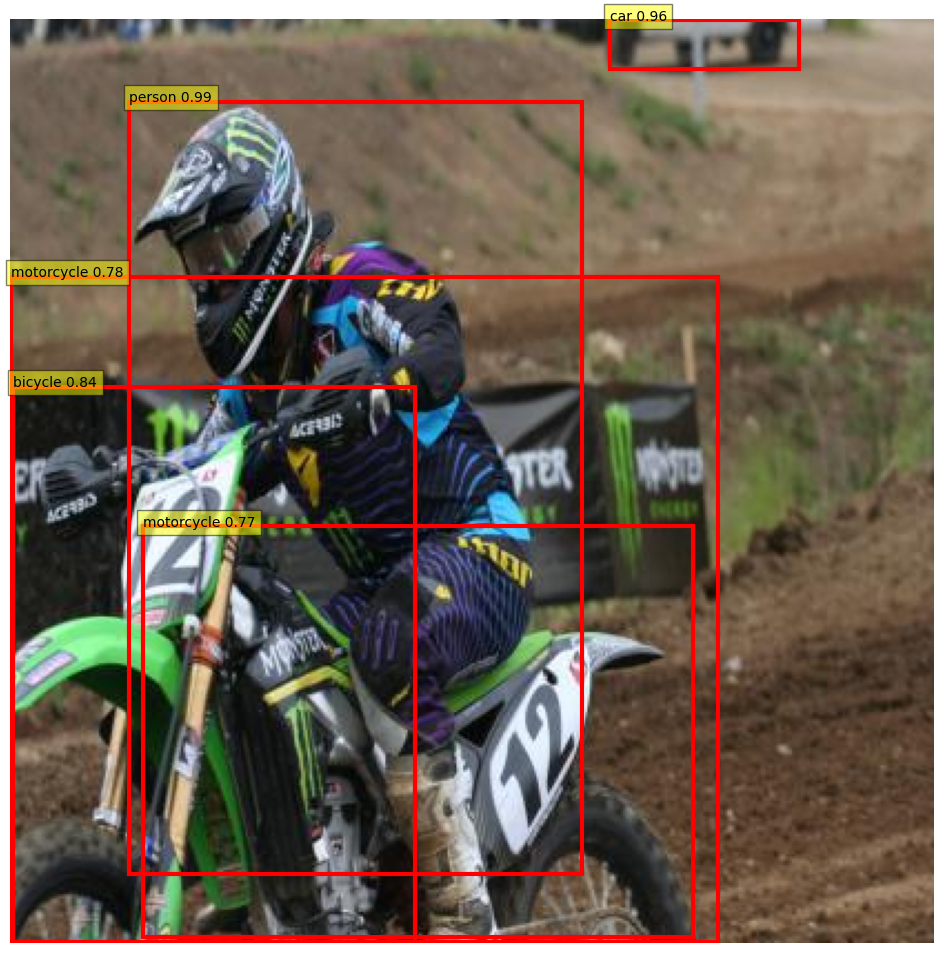

Output image saved: output/faster_rcnn_output/4.jpg_output.jpg
-------------------------------------------------- 

car tensor(0.9849)
cat tensor(0.5938)
horse tensor(0.5117)


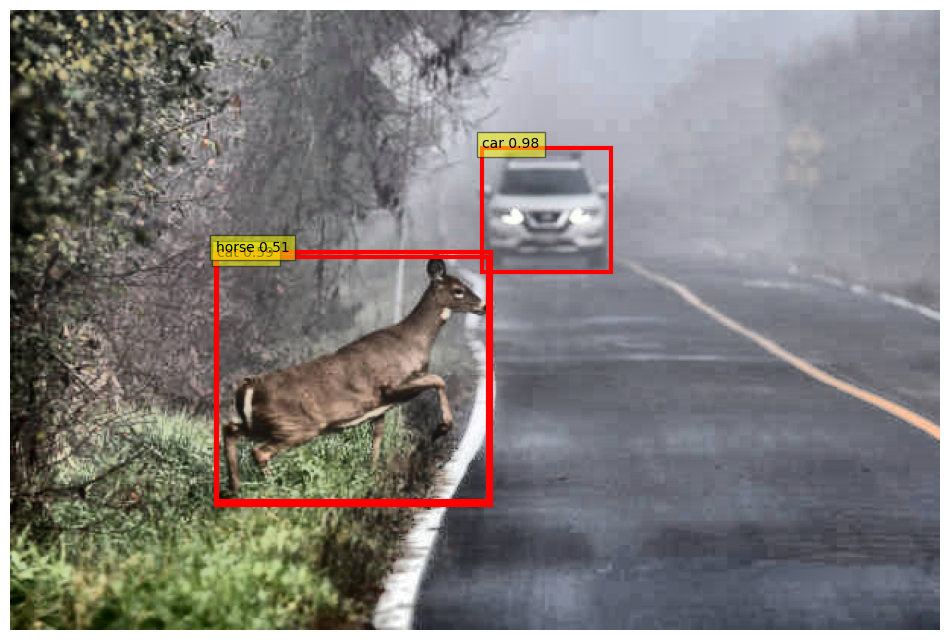

Output image saved: output/faster_rcnn_output/2.png_output.jpg
-------------------------------------------------- 

person tensor(0.9995)
car tensor(0.9950)
car tensor(0.9916)
truck tensor(0.9914)
car tensor(0.9844)
car tensor(0.9836)
traffic light tensor(0.9740)
car tensor(0.9655)
traffic light tensor(0.9472)
traffic light tensor(0.9457)
car tensor(0.9153)
traffic light tensor(0.9120)
traffic light tensor(0.8911)
car tensor(0.8730)
car tensor(0.8512)
car tensor(0.8269)
traffic light tensor(0.6135)
traffic light tensor(0.5750)


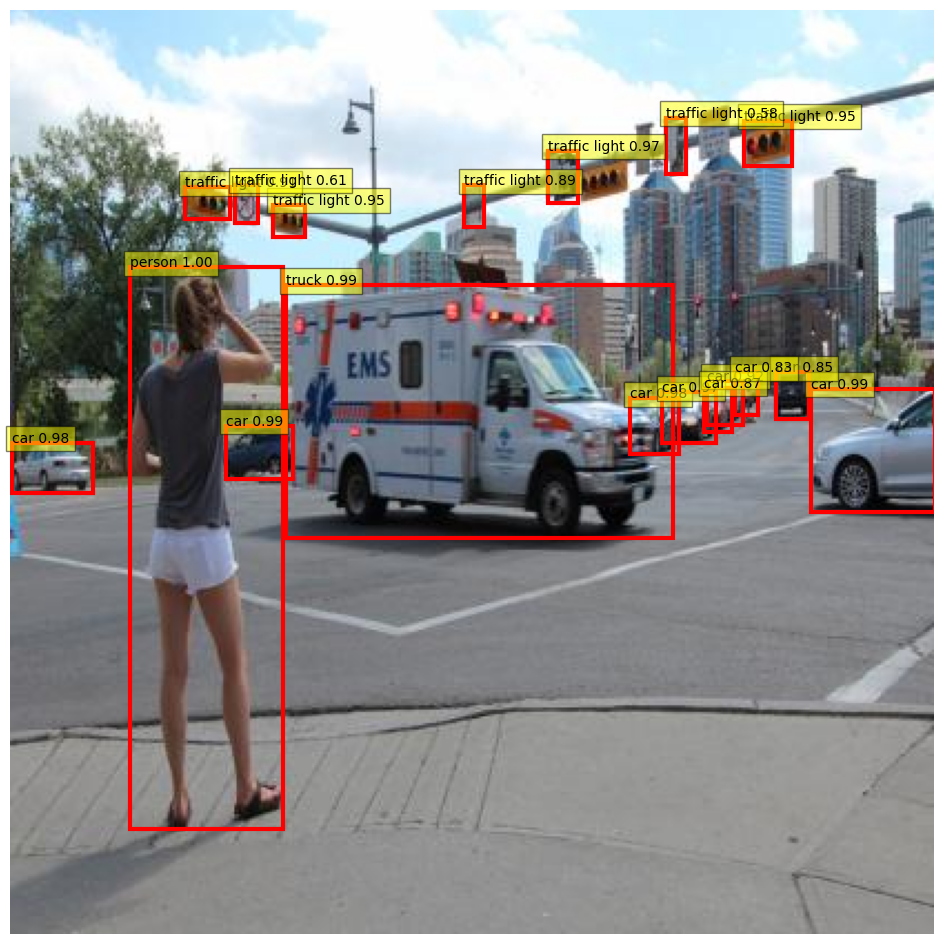

Output image saved: output/faster_rcnn_output/5.jpg_output.jpg
-------------------------------------------------- 



In [9]:
for imgg in imagess:
    image_tensor = preprocess_image(imgg)
    image_tensor = image_tensor.unsqueeze(0)

    # Perform inference
    with torch.no_grad():
        predictions = model(image_tensor)
        
    # Extract predictions
    preds = predictions[0]  # Since we have a batch size of 1
    boxes = preds['boxes']
    labels = preds['labels']
    scores = preds['scores']

    class_names = [COCO_CLASSES[label] if label < len(COCO_CLASSES) else 'unknown' for label in labels]

    threshold = 0.5
    keep = scores >= threshold
    boxes = boxes[keep]
    class_names = [class_names[i] for i in range(len(class_names)) if keep[i]]
    scores = scores[keep]
    
    # Draw the bounding boxes on the image
    draw_boxes(Image.open(imgg), boxes, class_names, scores)

<h2><a id = "v8">YOLO V8</a></h2>

**You Only Look Only version 8**

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

from ultralytics import YOLO

In [11]:
model_v8 = YOLO('yolov8n.pt') 

car: 0.44


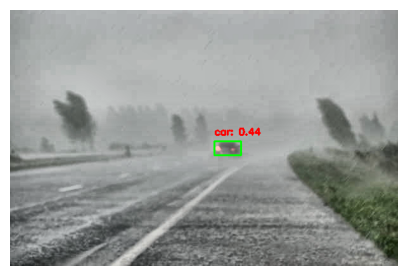

Output image saved: output/yolov8_output/1.png_output.jpg
-------------------------------------------------- 

person: 0.87
handbag: 0.37


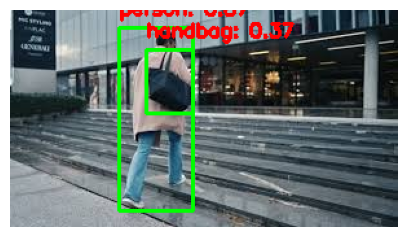

Output image saved: output/yolov8_output/6.jpeg_output.jpg
-------------------------------------------------- 

car: 0.38
truck: 0.33


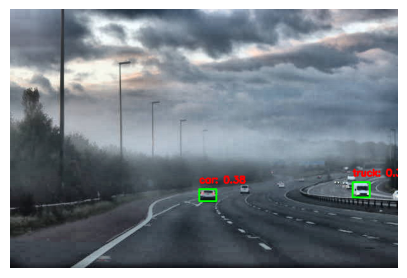

Output image saved: output/yolov8_output/3.png_output.jpg
-------------------------------------------------- 

person: 0.93
laptop: 0.93
tie: 0.68


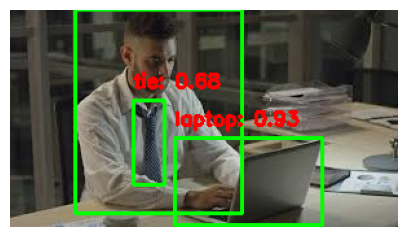

Output image saved: output/yolov8_output/7.jpeg_output.jpg
-------------------------------------------------- 

motorcycle: 0.77
person: 0.44
car: 0.28


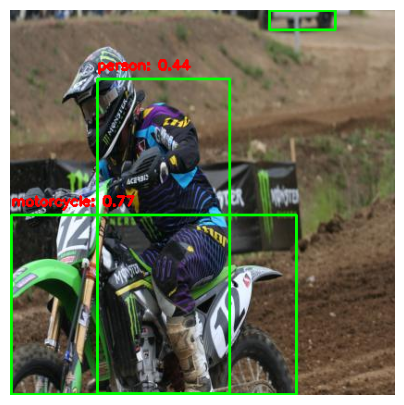

Output image saved: output/yolov8_output/4.jpg_output.jpg
-------------------------------------------------- 

dog: 0.88
car: 0.63


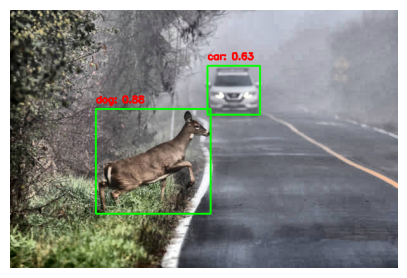

Output image saved: output/yolov8_output/2.png_output.jpg
-------------------------------------------------- 

car: 0.85
person: 0.84
car: 0.82
truck: 0.78
car: 0.65
car: 0.63
traffic light: 0.52
traffic light: 0.49
traffic light: 0.39
car: 0.36
truck: 0.34
traffic light: 0.32
traffic light: 0.31
traffic light: 0.29
traffic light: 0.27


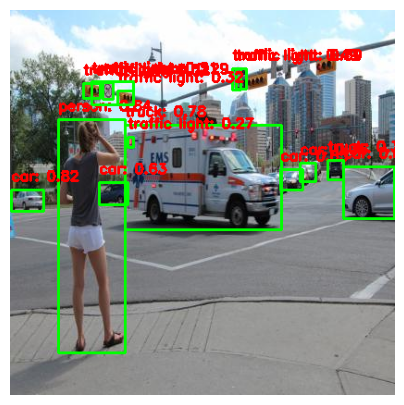

Output image saved: output/yolov8_output/5.jpg_output.jpg
-------------------------------------------------- 



In [12]:
for imgg in imagess:
    results = model_v8.predict(
        source=imgg,  # path to image or video
        conf=0.25,  # confidence threshold
        iou=0.45,  # NMS IoU threshold
        max_det=1000,  # maximum number of detections per image
        verbose=False
    #     device=0  # device to use for inference (0 for CPU, 0,1,2,3... for GPU)
    )
    for result in results:
    # Each result is a tensor containing bounding boxes and their attributes
        detections = result.boxes.xyxy.cpu().numpy()  # Get bounding boxes in xyxy format
        confidences = result.boxes.conf.cpu().numpy()  # Get confidence scores
        class_ids = result.boxes.cls.cpu().numpy()  # Get class IDs  

        # Load the original image for visualization
        img = cv2.imread(imgg)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for visualization

        # Draw bounding boxes on the image
        for box, conf, cls in zip(detections, confidences, class_ids):
            x_min, y_min, x_max, y_max = map(int, box)  # Convert to int
            class_name = model_v8.names[int(cls)]  # Get class name from model
            label = f'{class_name}: {conf:.2f}'  # Create label with class name
            img = cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)  # Draw rectangle
            img = cv2.putText(img, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)  # Draw label
            print(label)

        # Display the image with detections
        plt.figure(figsize=(5,5))
        plt.imshow(img)
        plt.axis('off')
        
        output_folder_name = 'output/yolov8_output'
        output_file_name = os.path.basename(imgg)
        output_image_path = os.path.join(output_folder_name, f"{output_file_name}_output.jpg")

        # Create output folder if it doesn't exist
        if not os.path.exists(output_folder_name):
            os.makedirs(output_folder_name)

        plt.savefig(output_image_path, dpi=300)  # Save at high resolution (adjust as needed)

        plt.show()
        print(f"Output image saved: {output_image_path}")
        print('-'*50,'\n')

<h2><a id = "v5">YOLO V5 FOG</a></h2>

**You Only Look Only version 5 specialised for foggy images**

In [13]:
import os 
import torch

In [14]:
model_5 = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True, verbose=False)

YOLOv5 🚀 2024-8-14 Python-3.8.17 torch-2.0.0+cu117 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


image 1/1: 405x612 1 car, 1 truck
Speed: 8.4ms pre-process, 195.9ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


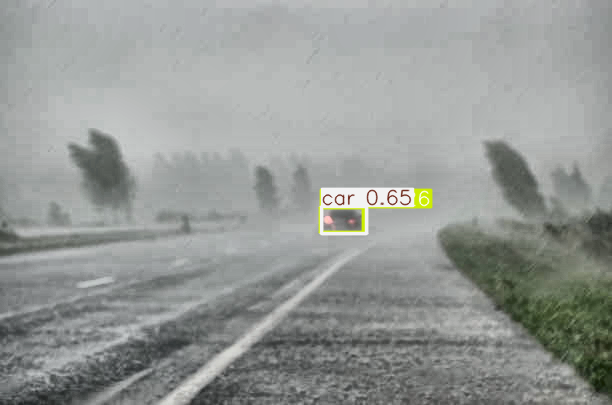

image 1/1: 168x300 2 persons, 1 backpack, 1 handbag
Speed: 2.3ms pre-process, 177.1ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


Output image saved: output/yolov5_fog_output/1.png
-------------------------------------------------- 



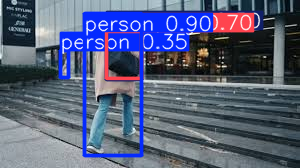

Output image saved: output/yolov5_fog_output/6.jpeg
-------------------------------------------------- 



image 1/1: 409x612 11 cars, 1 truck
Speed: 6.7ms pre-process, 169.2ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


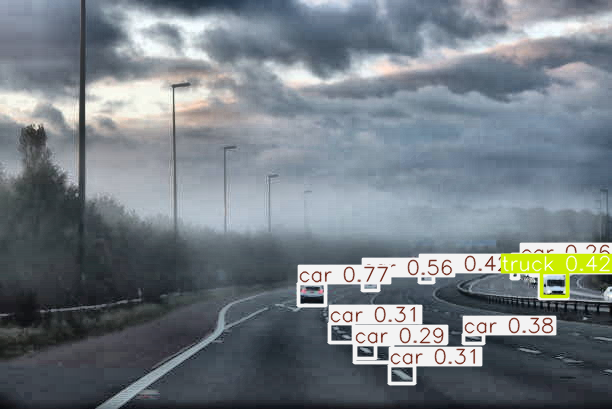

image 1/1: 168x300 1 person, 1 tie, 1 chair, 1 laptop, 1 book
Speed: 2.5ms pre-process, 147.4ms inference, 0.9ms NMS per image at shape (1, 3, 384, 640)


Output image saved: output/yolov5_fog_output/3.png
-------------------------------------------------- 



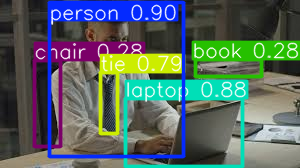

Output image saved: output/yolov5_fog_output/7.jpeg
-------------------------------------------------- 



image 1/1: 416x416 1 person, 1 car, 1 motorcycle
Speed: 3.9ms pre-process, 281.6ms inference, 1.1ms NMS per image at shape (1, 3, 640, 640)


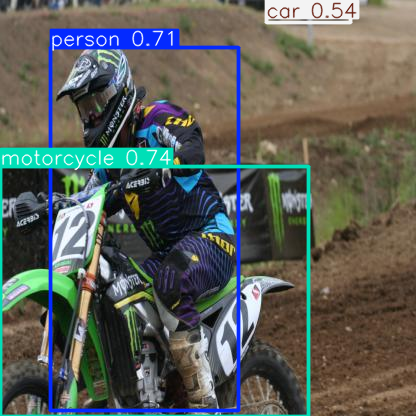

image 1/1: 408x612 1 car, 1 truck, 1 dog
Speed: 6.1ms pre-process, 168.7ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


Output image saved: output/yolov5_fog_output/4.jpg
-------------------------------------------------- 



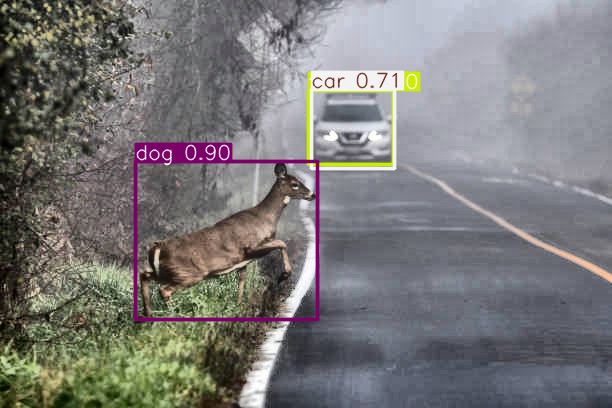

Output image saved: output/yolov5_fog_output/2.png
-------------------------------------------------- 



image 1/1: 416x416 1 person, 9 cars, 2 trucks, 7 traffic lights
Speed: 4.0ms pre-process, 244.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)


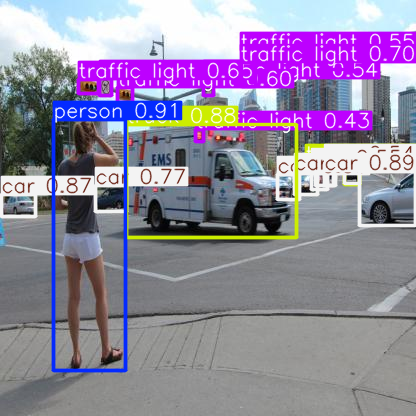

Output image saved: output/yolov5_fog_output/5.jpg
-------------------------------------------------- 



In [15]:
output_folder_name = 'output/yolov5_fog_output'
if not os.path.exists(output_folder_name):
    os.makedirs(output_folder_name)
    
for imgg in imagess:
    res5 = model_5(imgg, augment=True)
    image = res5.render()[0]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    output_file_name = os.path.basename(imgg)
    output_image_path = os.path.join(output_folder_name, f"{output_file_name}")
    cv2.imwrite(output_image_path, image)
    res5.print()
    res5.show()
    print(f"Output image saved: {output_image_path}")
    print('-'*50,'\n')